<a href="https://colab.research.google.com/github/Debajyoti2000/Machine-learning/blob/main/employee_retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
import seaborn as sns

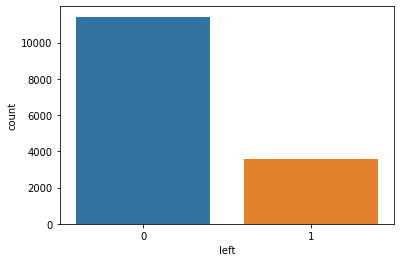

In [ ]:
sns.countplot(x="left", data=df)

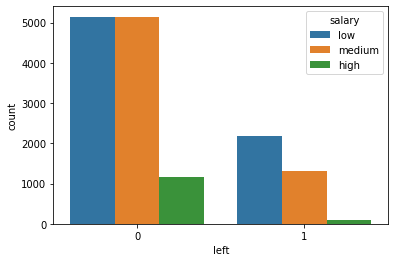

In [ ]:
sns.countplot(x="left", hue="salary", data=df)

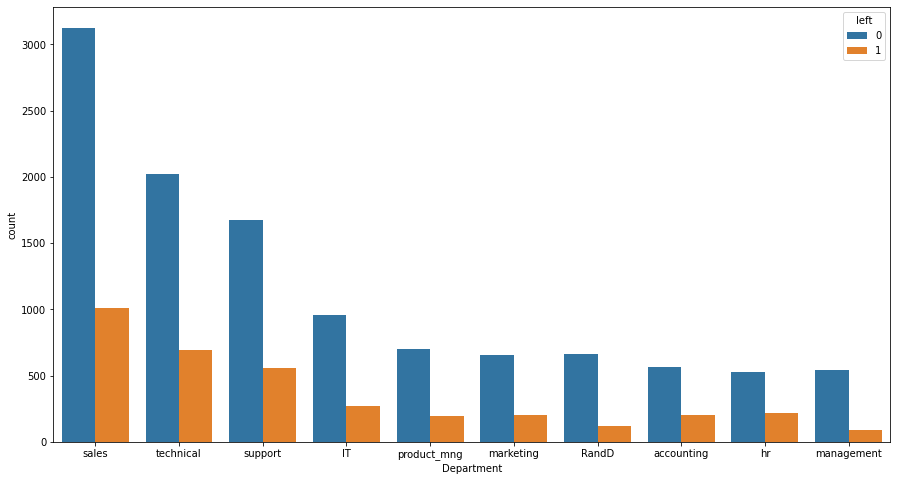

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x="Department", hue="left", data=df,order = df['Department'].value_counts().index);

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(11991, 10)

In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','Department','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Department,salary
0,0.38,157,0,sales,low
1,0.80,262,0,sales,medium
2,0.11,272,0,sales,medium
3,0.72,223,0,sales,low
4,0.37,159,0,sales,low


In [ ]:
subdf['salary']=subdf['salary'].replace('low',0)
subdf['salary']=subdf['salary'].replace('medium',1)
subdf['salary']=subdf['salary'].replace('high',2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Department,salary
0,0.38,157,0,sales,0
1,0.80,262,0,sales,1
2,0.11,272,0,sales,1
3,0.72,223,0,sales,0
4,0.37,159,0,sales,0


In [ ]:
subdf.describe(include='all')

,satisfaction_level,average_montly_hours,promotion_last_5years,Department,salary
count,11991.000000,11991.000000,11991.000000,11991,11991.00000
unique,NaN,NaN,NaN,10,NaN
top,NaN,NaN,NaN,sales,NaN
freq,NaN,NaN,NaN,3239,NaN
mean,0.629658,200.473522,0.016929,NaN,0.60387
std,0.241070,48.727813,0.129012,NaN,0.63590
min,0.090000,96.000000,0.000000,NaN,0.00000
25%,0.480000,157.000000,0.000000,NaN,0.00000
50%,0.660000,200.000000,0.000000,NaN,1.00000
75%,0.820000,243.000000,0.000000,NaN,1.00000


In [ ]:
subdf.shape

(11991, 5)

In [ ]:
Department_dummies = pd.get_dummies(subdf.Department, prefix="Department")

In [ ]:
Department_dummies

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,1,0,0,0,0,0
11996,0,0,0,0,1,0,0,0,0,0
11997,0,0,0,0,1,0,0,0,0,0
11998,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_with_dummies = pd.concat([subdf,Department_dummies],axis='columns')

In [ ]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Department,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,157,0,sales,0,0,0,0,0,0,0,0,1,0,0
1,0.80,262,0,sales,1,0,0,0,0,0,0,0,1,0,0
2,0.11,272,0,sales,1,0,0,0,0,0,0,0,1,0,0
3,0.72,223,0,sales,0,0,0,0,0,0,0,0,1,0,0
4,0.37,159,0,sales,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_with_dummies.drop('Department',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,157,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,262,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,272,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,223,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,159,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_with_dummies.drop('Department_IT',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,157,0,0,0,0,0,0,0,0,1,0,0
1,0.80,262,0,1,0,0,0,0,0,0,1,0,0
2,0.11,272,0,1,0,0,0,0,0,0,1,0,0
3,0.72,223,0,0,0,0,0,0,0,0,1,0,0
4,0.37,159,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_with_dummies.shape

(11991, 13)

In [ ]:
x=df_with_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,157,0,0,0,0,0,0,0,0,1,0,0
1,0.80,262,0,1,0,0,0,0,0,0,1,0,0
2,0.11,272,0,1,0,0,0,0,0,0,1,0,0
3,0.72,223,0,0,0,0,0,0,0,0,1,0,0
4,0.37,159,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y=df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(x_test,y_test)

0.8565869927737632